In [675]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm
import numpy as np

In [676]:
df = pd.read_excel("datos_base.xlsx")

In [677]:
df

,Nombre Semana,Año,Semestre,Trimestre,Mes,Dia del Mes,Marca,Segmento,Mercado,Cantidad,Facturación,Precio,Sub Marca
0,Semana 1,2020,S1-20,T1-20,Enero 2020,"Jueves, 2 de Enero de 2020",Nike,Futbol,Mercado 1,691,6093252.00,8818.02,Nike
1,Semana 1,2020,S1-20,T1-20,Enero 2020,"Jueves, 2 de Enero de 2020",Nike,Futbol,Mercado 2,683,6022704.00,8818.01,Nike
2,Semana 1,2020,S1-20,T1-20,Enero 2020,"Jueves, 2 de Enero de 2020",Nike,Running,Mercado 1,661,5348147.00,8090.99,Nike
3,Semana 1,2020,S1-20,T1-20,Enero 2020,"Jueves, 2 de Enero de 2020",Nike,Running,Mercado 2,520,4207317.00,8090.99,Nike
4,Semana 1,2020,S1-20,T1-20,Enero 2020,"Jueves, 2 de Enero de 2020",Nike,Social,Mercado 1,993,12547566.00,12636.02,Nike
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25165,Semana 9,2022,S1-22,T1-22,Febrero 2022,"Sabado, 26 de Febrero de 2022",Asics,Running,Mercado 2,526,5477198.00,10412.92,Asics
25166,Semana 9,2022,S1-22,T1-22,Febrero 2022,"Sabado, 26 de Febrero de 2022",Asics,Social,Mercado 1,279,3424165.00,12272.99,Onitsuka Tiger
25167,Semana 9,2022,S1-22,T1-22,Febrero 2022,"Sabado, 26 de Febrero de 2022",Asics,Social,Mercado 2,242,2970059.00,12272.97,Onitsuka Tiger
25168,Semana 9,2022,S1-22,T1-22,Febrero 2022,"Sabado, 26 de Febrero de 2022",Asics,Social,Mercado 1,128,1163648.00,9091.00,Asics Tiger


# Limpieza

In [678]:
print(df.isnull().sum())
print(f'\nDuplicados:{df.duplicated().sum()}')

Nombre Semana    0
Año              0
Semestre         0
Trimestre        0
Mes              0
Dia del Mes      0
Marca            0
Segmento         0
Mercado          0
Cantidad         0
Facturación      0
Precio           0
Sub Marca        0
dtype: int64

Duplicados:0


In [679]:
df.dtypes

Nombre Semana     object
Año                int64
Semestre          object
Trimestre         object
Mes               object
Dia del Mes       object
Marca             object
Segmento          object
Mercado           object
Cantidad           int64
Facturación      float64
Precio           float64
Sub Marca         object
dtype: object

### Conversion de columna a fecha

In [680]:
df['nombre_del_dia'] = df['Dia del Mes'].str.split(', ').str[0]
df['Dia del Mes'] = df['Dia del Mes'].str.split(', ').str[1]

In [681]:
# Cambio de columna 'Dia del mes' a formato fecha
month_mapping = {'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6, 'Julio': 7,
                     'Agosto': 8, 'Setiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12}

df[['dia','mes','año']] =df['Dia del Mes'].str.split(' de ', expand = True)
df['mes'] = df['mes'].replace(month_mapping)
df['fecha'] = df['dia'].astype(str) + "/" + df['mes'].astype(str) + "/" + df['año'].astype(str)
df['fecha'] = pd.to_datetime(df['fecha'], format = '%d/%m/%Y')

### Distribuciones y outliers

In [682]:
def distr_values(variable, dataframe, titulo = ""):
    fig, ax = plt.subplots(1,2, figsize=(7,3))

    fig.suptitle(titulo, y = 1.05)

    ax[0].set_title(f"Distribucion de {variable}")
    sns.histplot(data = dataframe, x = f"{variable}", kde = True, ax = ax[0])

    ax[1].set_title(f"Boxplot de {variable}")
    sns.boxplot(data=dataframe, x = f"{variable}", ax = ax[1])

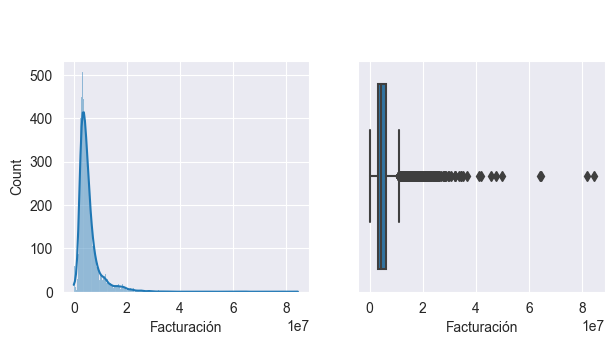

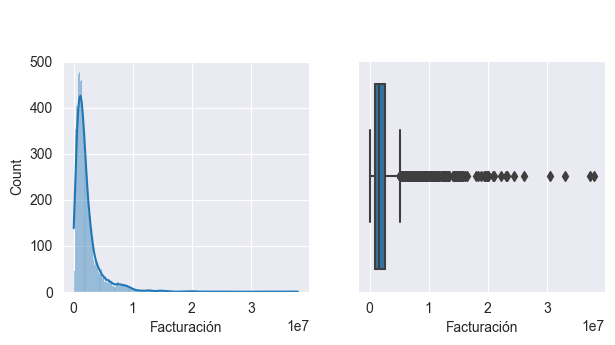

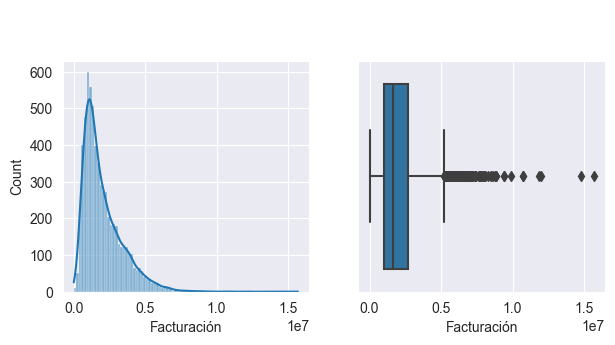

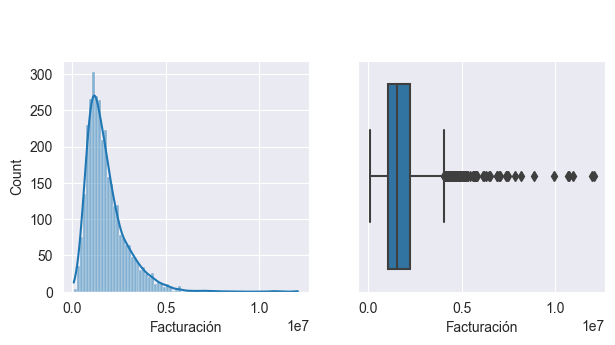

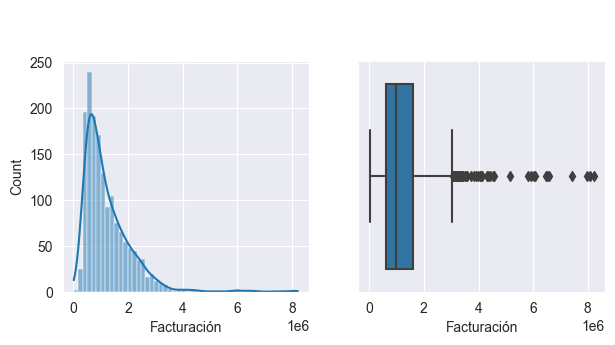

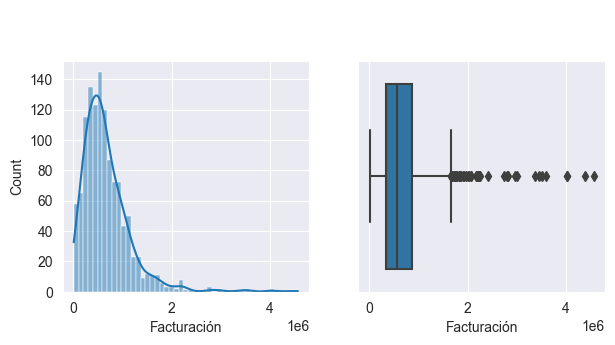

In [683]:
for marca in df['Sub Marca'].unique():
    sub_df = df[df['Sub Marca'] == marca]
    distr_values('Facturación',sub_df, titulo = f'Marca {marca}')

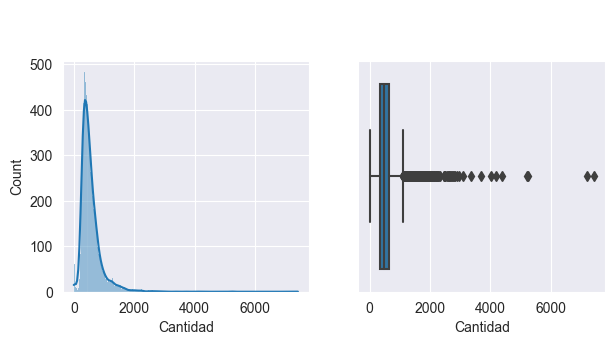

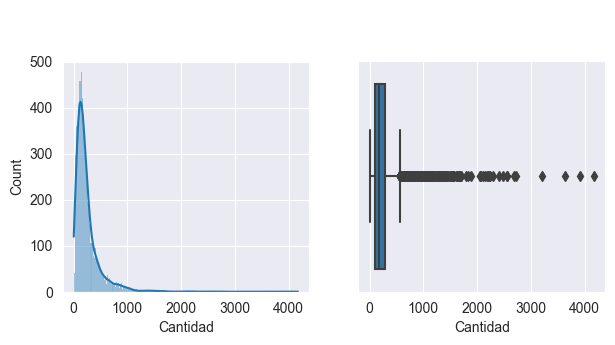

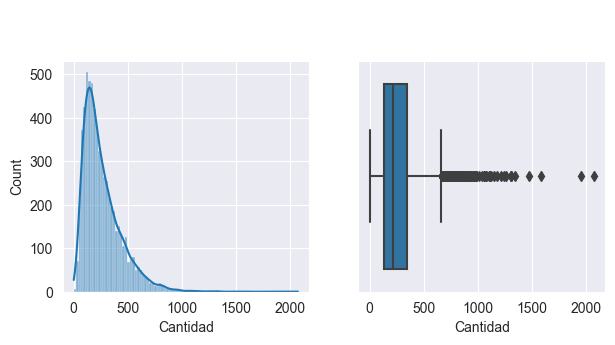

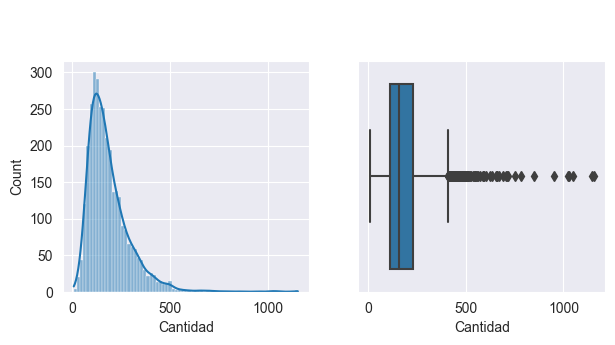

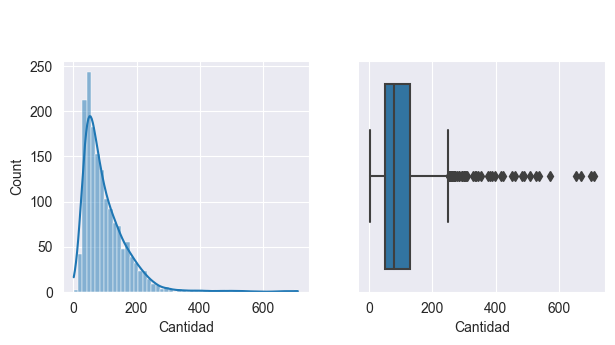

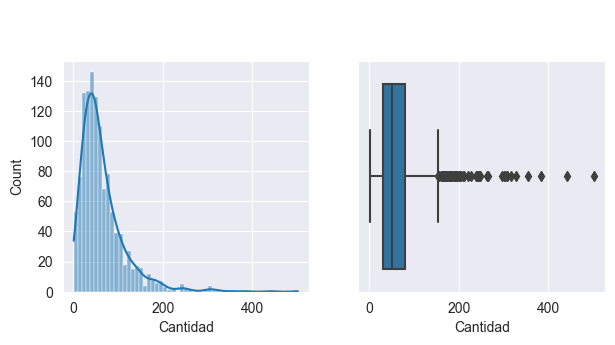

In [684]:
#Distribuciones de Cantidad
for marca in df['Sub Marca'].unique():
    sub_df = df[df['Sub Marca'] == marca]
    distr_values('Cantidad',sub_df, titulo = f'Marca {marca}')

In [685]:
#Distribuciones de Precio
#for marca in df['Sub Marca'].unique():
    #sub_df = df[df['Sub Marca'] == marca]
    #distr_values('Precio',sub_df, titulo = f'Marca {marca}')

# Analisis

In [686]:
df['semana_año'] = +df['Año'].astype(str) + "_"  +df['Nombre Semana'].str.split(" ").str[1]
df['semana_año'] = pd.to_datetime(df['semana_año'] + '_1', format='%Y_%W_%w').dt.strftime('%Y_%W')

In [687]:
color_fondo = '#001e64ff'

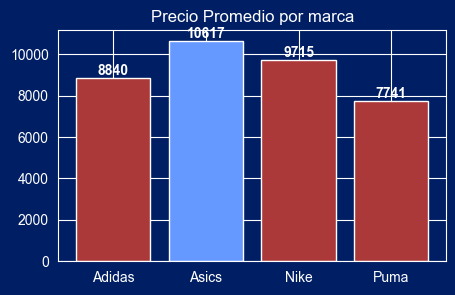

In [688]:
marca_precio_promedio = df.groupby(by = ['Marca']).agg({"Precio": "mean"})

plt.figure(figsize=(5, 3))

# Setting the background color of the entire figure
plt.gcf().set_facecolor(color_fondo)
plt.bar(marca_precio_promedio.index, marca_precio_promedio['Precio'], color = ['#ac3939','#6699ff' ,'#ac3939','#ac3939'])

ax = plt.gca()

# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor(color_fondo)

for i, value in enumerate(marca_precio_promedio['Precio']):
    plt.text(i, value + 1, str(int(value)), ha='center', va='bottom', color = 'white', weight = 'bold')

# Set text color for axes labels
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Set text color for title
ax.title.set_color('white')

# Set text color for tick labels
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.title('Precio Promedio por marca')
plt.savefig('imagenes/marcas_precios.jpg', format='jpg', dpi=300)
plt.show()

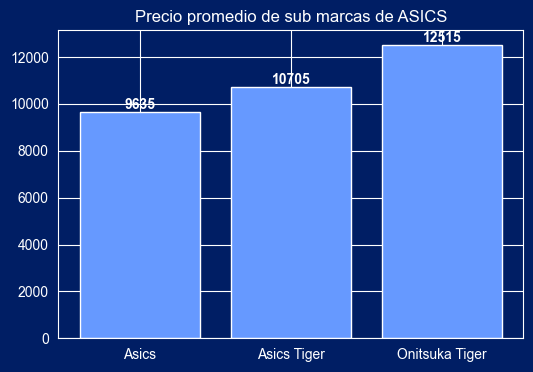

In [689]:
df_asics = df[df['Marca'] == 'Asics']
submarcas_precio_promedio = df_asics.groupby(by = 'Sub Marca').agg({'Precio':'mean'})

df_sub_asics = df[df['Sub Marca'] == 'Asics']
df_sub_asics.groupby(by = "Segmento").agg({'Precio':'mean'})

plt.figure(figsize=(6, 4))

plt.gcf().set_facecolor(color_fondo)
plt.bar(submarcas_precio_promedio.index, submarcas_precio_promedio['Precio'], color = '#6699ff')

ax = plt.gca()
ax.set_facecolor(color_fondo)

for i, value in enumerate(submarcas_precio_promedio['Precio']):
    plt.text(i, value + 1, str(int(value)), ha='center', va='bottom', color = 'white', weight = 'bold')

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Set text color for title
ax.title.set_color('white')

# Set text color for tick labels
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.title('Precio promedio de sub marcas de ASICS')
plt.savefig('imagenes/submarcas_asics_precios.jpg', format='jpg', dpi=300)
plt.show()

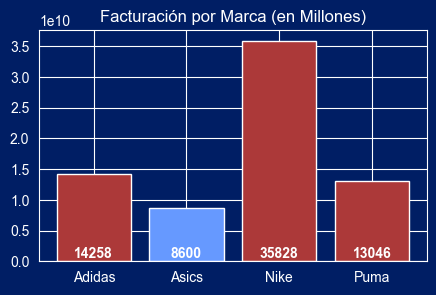

In [690]:
facturación_por_marca = df.groupby('Marca').agg({'Facturación':'sum'})




plt.figure(figsize=(5, 3))

# Setting the background color of the entire figure
plt.gcf().set_facecolor(color_fondo)
plt.bar(facturación_por_marca.index, facturación_por_marca['Facturación'], color = ['#ac3939','#6699ff' ,'#ac3939','#ac3939'])
ax = plt.gca()

# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor(color_fondo)

for i, value in enumerate(facturación_por_marca['Facturación']):
    value = value / 1000000
    plt.text(i, value + 1, str(int(value)), ha='center', va='bottom', color='white', weight='bold')

# Set text color for axes labels
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Set text color for title
ax.title.set_color('white')

# Set text color for tick labels
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.title('Facturación por Marca (en Millones)')
plt.savefig('imagenes/facturacion_por_marca.jpg', format='jpg', dpi=300)
plt.show()


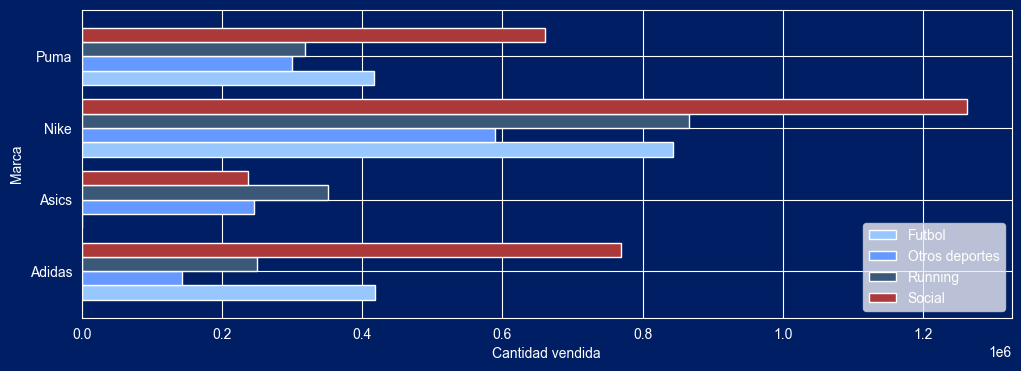

In [691]:


# Assuming you have already imported pandas and have df_cantidad_marca DataFrame

# Grouping and aggregating data
df_cantidad_marca = df.groupby(['Marca', 'Segmento']).agg({'Cantidad': 'sum'}).unstack()
df_cantidad_marca.columns = ['Futbol', 'Otros deportes', 'Running', 'Social']
# Unstacking and plotting
ax = df_cantidad_marca.plot(kind='barh', width=0.8, figsize=(12, 4), color = ['#97c7fc','#6699ff' ,'#3c5878','#ac3939'] )

# Setting plot and figure background color
ax.set_facecolor(color_fondo)  # Plot background color
fig = plt.gcf()
fig.set_facecolor(color_fondo)  # Figure background color

# Setting xticks and yticks color to white
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Setting labels color to white
ax.set_xlabel('Cantidad vendida', color='white')
ax.set_ylabel('Marca', color='white')


# Display the plot
plt.savefig('imagenes/segmento_por_marca.jpg', format = 'jpg', dpi = 300)
plt.show()


In [692]:
df_cantidad_marca.unstack()

                Marca 
Futbol          Adidas    418514.00
                Asics           NaN
                Nike      843676.00
                Puma      416650.00
Otros deportes  Adidas    142743.00
                Asics     246073.00
                Nike      588978.00
                Puma      299701.00
Running         Adidas    250603.00
                Asics     350632.00
                Nike      865883.00
                Puma      318285.00
Social          Adidas    768871.00
                Asics     237216.00
                Nike     1263353.00
                Puma      661395.00
dtype: float64

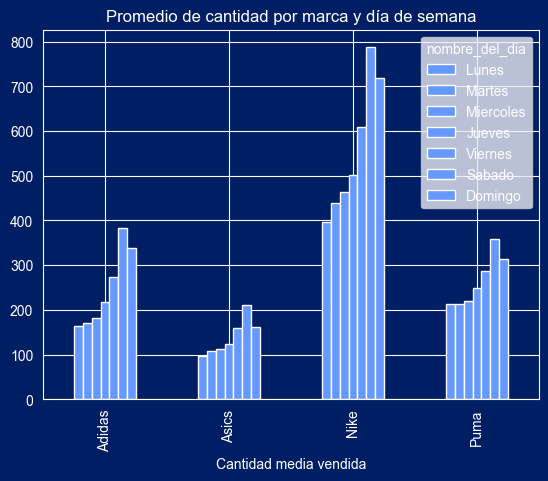

In [693]:
import pandas as pd
import matplotlib.pyplot as plt

# Your grouped dataframe
grouped_df = df.groupby(by=['Marca', 'nombre_del_dia']).agg({'Cantidad': 'mean'}).reset_index()

orden_dias = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
cat_dtype = pd.CategoricalDtype(categories=orden_dias, ordered=True)

grouped_df['nombre_del_dia'] = grouped_df['nombre_del_dia'].astype(cat_dtype)

# Pivot the table for better plotting
pivot_dia_de_la_semana = grouped_df.pivot(index='Marca', columns='nombre_del_dia', values='Cantidad')

# Plotting
fig, ax = plt.subplots()

# Set the background color of the plot
ax.set_facecolor(color_fondo)  # Use your preferred color code

# Set the background color of the figure
fig.set_facecolor(color_fondo)  # Use your preferred color code

pivot_dia_de_la_semana.plot(kind='bar', color='#6699ff', ax=ax)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set title and xlabel
plt.title('Promedio de cantidad por marca y día de semana')
plt.xlabel('Day of the Week', color = 'white')
plt.xlabel('Cantidad media vendida', color = 'white')

plt.savefig('imagenes/dia_cantidad_vendida.jpg', format = 'jpg', dpi = 300)
plt.show()


In [694]:
group_trimestre  = df.groupby(['Trimestre','Marca']).agg({'Cantidad':'sum'}).reset_index()

group_trimestre[['trim','anio']] = group_trimestre['Trimestre'].str.split('-', expand = True)

group_trimestre = group_trimestre.sort_values(by=['anio','trim'])

group_trimestre

,Trimestre,Marca,Cantidad,trim,anio
0,T1-20,Adidas,172245,T1,20
1,T1-20,Asics,97699,T1,20
2,T1-20,Nike,423382,T1,20
3,T1-20,Puma,189242,T1,20
12,T2-20,Adidas,153121,T2,20
13,T2-20,Asics,72903,T2,20
14,T2-20,Nike,370496,T2,20
15,T2-20,Puma,156288,T2,20
20,T3-20,Adidas,145389,T3,20
21,T3-20,Asics,73239,T3,20


In [695]:
trimestre_agrupados = group_trimestre.groupby(['trim','Marca']).agg({'Cantidad':'mean'})
trimestre_agrupados

Cantidad
trim Marca           
T1   Adidas 182891.00
     Asics  101167.33
     Nike   395614.67
     Puma   190613.00
T2   Adidas 146572.00
     Asics   77888.00
     Nike   366164.00
     Puma   153548.50
T3   Adidas 144388.50
     Asics   79562.00
     Nike   356530.50
     Puma   181347.00
T4   Adidas 225068.50
     Asics  107759.50
     Nike   464828.50
     Puma   227200.50

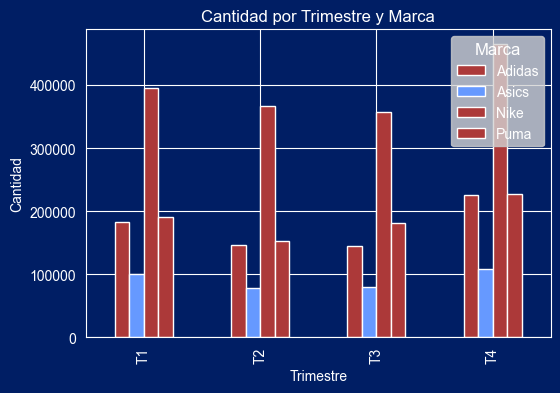

In [696]:
trimestre_unstacked = trimestre_agrupados.unstack()
trimestre_unstacked.columns = ['Adidas', 'Asics', 'Nike', 'Puma']

trimestre_unstacked.plot(kind='bar', stacked=False, figsize=(6, 4), color= ['#ac3939','#6699ff' ,'#ac3939','#ac3939'])  # Change 'lightblue' to the desired plot color

# Change plot background color
plt.gca().set_facecolor(color_fondo)

# Change figure background color
fig = plt.gcf()
fig.set_facecolor(color_fondo)

# Turn ticks and labels to white
plt.xticks(color='white')
plt.yticks(color='white')
plt.title('Cantidad por Trimestre y Marca', color='white')
plt.xlabel('Trimestre', color='white')
plt.ylabel('Cantidad', color='white')
plt.legend(title='Marca', facecolor='lightgray', title_fontsize='12', labelcolor='white')  # Change facecolor to the desired legend background color

plt.savefig('imagenes/trim_marca.jpg', format = 'jpg', dpi = 300)
plt.show()

In [697]:
df_asics_puma = df[((df['Marca'] == 'Asics') | (df['Marca'] == 'Puma')) & (df['Segmento'] != 'Futbol')]

gr_asics_asics_puma = df_asics_puma.groupby(['Marca','Segmento']).agg({'Facturación':'mean'})

pivot_asics_puma = gr_asics_asics_puma.unstack()

pivot_asics_puma.columns = ['Otros deportes', 'Running', 'Social']


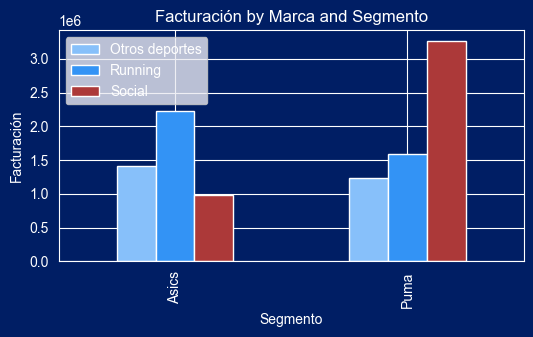

In [698]:
ax = pivot_asics_puma.plot(kind='bar', figsize=(6, 3), color = ['#87c0fa', '#3393f5','#ac3939'])

# Set plot labels and title
ax.set_xlabel('Segmento', color = 'white')
ax.set_ylabel('Facturación', color = 'white')
ax.set_title('Facturación by Marca and Segmento', color = 'white')

# Customize background color for both plot and figure
ax.set_facecolor(color_fondo)  # Plot background color
fig = plt.gcf()
fig.set_facecolor(color_fondo)  # Figure background color

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Show the plot
plt.savefig('imagenes/puma_asics.jpg', format = 'jpg', dpi = 300)
plt.show()


In [699]:
df_asics.groupby('Segmento').agg({'Cantidad':'mean'})

,Cantidad
Segmento,
O. Deportes,153.99
Running,219.42
Social,84.45


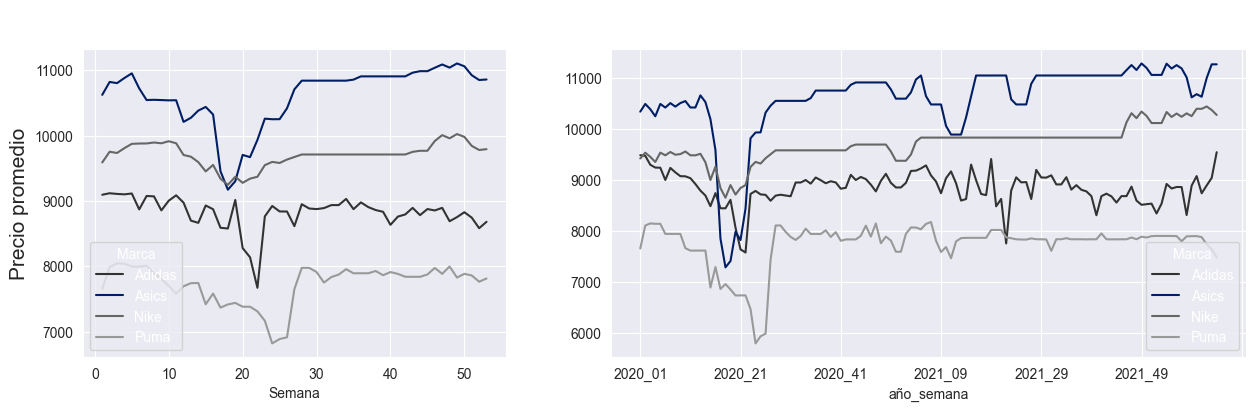

In [700]:
colors = ['#333333','#001e64', '#666666', '#999999']

analisis = 'Marca'
valores = 'Precio'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), gridspec_kw={'width_ratios': [1, 1.5]})

#Plot Semanas acumuladas
pivot_precio = df.pivot_table(index = 'Nombre Semana', columns = analisis, values = valores, aggfunc='mean').reset_index()
pivot_precio["Nombre Semana"] = pivot_precio["Nombre Semana"].str.split(" ").str[1].astype(int)
pivot_precio = pivot_precio.sort_values(by = "Nombre Semana").set_index('Nombre Semana')
pivot_precio.plot(color = colors,ax=axes[0], xlabel = 'Semana')
axes[0].set_ylabel("Precio promedio", fontsize = 15)

#plot evolucion
pivot_evolucion_precio = df.pivot_table(index = 'semana_año', columns= analisis, values= valores, aggfunc= 'mean')
pivot_evolucion_precio.plot(color = colors, ax = axes[1], xlabel = "año_semana")

#plot show
fig.suptitle(f'Analisis de {valores} segun {analisis}', fontsize = 15)
plt.show()

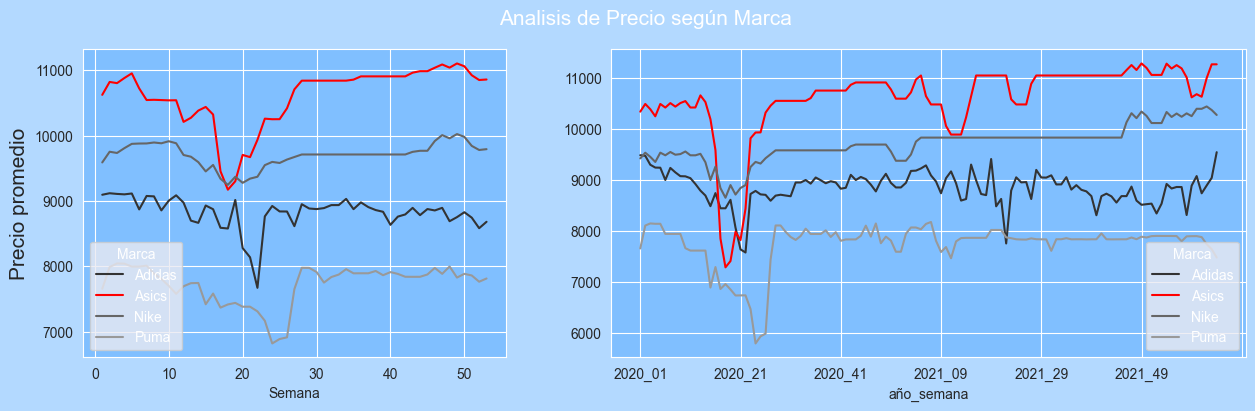

In [701]:
colors = ['#333333', 'red', '#666666', '#999999']

analisis = 'Marca'
valores = 'Precio'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), gridspec_kw={'width_ratios': [1, 1.5]})

# Plot Semanas acumuladas
pivot_precio = df.pivot_table(index='Nombre Semana', columns=analisis, values=valores, aggfunc='mean').reset_index()
pivot_precio["Nombre Semana"] = pivot_precio["Nombre Semana"].str.split(" ").str[1].astype(int)
pivot_precio = pivot_precio.sort_values(by="Nombre Semana").set_index('Nombre Semana')
pivot_precio.plot(color=colors, ax=axes[0], xlabel='Semana')
axes[0].set_ylabel("Precio promedio", fontsize=15)

# Plot evolución
pivot_evolucion_precio = df.pivot_table(index='semana_año', columns=analisis, values=valores, aggfunc='mean')
pivot_evolucion_precio.plot(color=colors, ax=axes[1], xlabel="año_semana")

# Set background color for each subplot
axes[0].set_facecolor('#80bfff')  # Set the background color for the first subplot
axes[1].set_facecolor('#80bfff')  # Set the background color for the second subplot

# Set background color for the entire figure
fig.patch.set_facecolor('#b3d9ff')

# Plot show
fig.suptitle(f'Analisis de {valores} según {analisis}', fontsize=15)
plt.savefig('imagenes/evolucion_precio.jpg',format = 'jpg', dpi = 300)
plt.show()

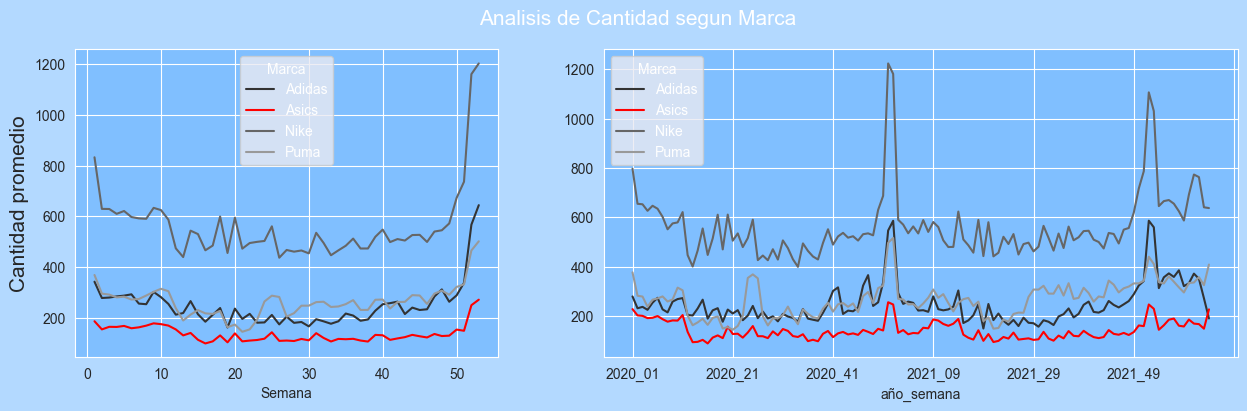

In [702]:
colors = ['#333333','red', '#666666', '#999999']

analisis = 'Marca'
valores = 'Cantidad'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), gridspec_kw={'width_ratios': [1, 1.5]})

#Plot Semanas acumuladas
pivot_cantidad = df.pivot_table(index = 'Nombre Semana', columns = analisis, values = valores, aggfunc='mean').reset_index()
pivot_cantidad["Nombre Semana"] = pivot_cantidad["Nombre Semana"].str.split(" ").str[1].astype(int)
pivot_cantidad = pivot_cantidad.sort_values(by = "Nombre Semana").set_index('Nombre Semana')
pivot_cantidad.plot(color = colors,ax=axes[0], xlabel = 'Semana')
axes[0].set_ylabel("Cantidad promedio", fontsize = 15)

#plot evolucion
pivot_evolucion_cantidad = df.pivot_table(index = 'semana_año', columns= analisis, values= valores, aggfunc= 'mean')
pivot_evolucion_cantidad.plot(color = colors, ax = axes[1], xlabel = "año_semana")

# Set background color for each subplot
axes[0].set_facecolor('#80bfff')  # Set the background color for the first subplot
axes[1].set_facecolor('#80bfff')  # Set the background color for the second subplot

# Set background color for the entire figure
fig.patch.set_facecolor('#b3d9ff')

#plot show
fig.suptitle(f'Analisis de {valores} segun {analisis}', fontsize = 15)
plt.savefig('imagenes/evolucion_cantidad.jpg',format = 'jpg', dpi = 300)
plt.show()

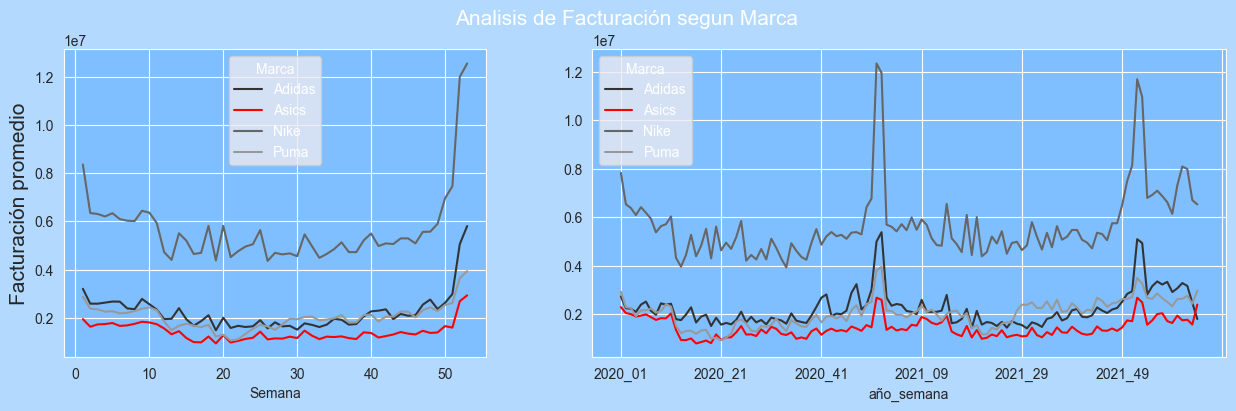

In [703]:
colors = ['#333333','red', '#666666', '#999999']

analisis = 'Marca'
valores = 'Facturación'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), gridspec_kw={'width_ratios': [1, 1.5]})

#Plot Semanas acumuladas
pivot_facturacion = df.pivot_table(index = 'Nombre Semana', columns = analisis, values = valores, aggfunc='mean').reset_index()
pivot_facturacion["Nombre Semana"] = pivot_facturacion["Nombre Semana"].str.split(" ").str[1].astype(int)
pivot_facturacion = pivot_facturacion.sort_values(by = "Nombre Semana").set_index('Nombre Semana')
pivot_facturacion.plot(color = colors,ax=axes[0], xlabel = 'Semana')
axes[0].set_ylabel("Facturación promedio", fontsize = 15)

#plot evolucion
pivot_evolucion_facturacion = df.pivot_table(index = 'semana_año', columns= analisis, values= valores, aggfunc= 'mean')
pivot_evolucion_facturacion.plot(color = colors, ax = axes[1], xlabel = "año_semana")

# Set background color for each subplot
axes[0].set_facecolor('#80bfff')  # Set the background color for the first subplot
axes[1].set_facecolor('#80bfff')  # Set the background color for the second subplot

# Set background color for the entire figure
fig.patch.set_facecolor('#b3d9ff')

#plot show
fig.suptitle(f'Analisis de {valores} segun {analisis}', fontsize = 15)
plt.savefig('imagenes/evolucion_facturacion.jpg',format = 'jpg', dpi = 300)
plt.show()

Exprimentan fuertes subas a fin de año, ASICS deberia hacer algo al respecto, parece ser la que menos crece.

In [704]:
df['numero_semana'] = df['Nombre Semana'].str.split().str[1]
pivot_fin_de_anio = df[(df['numero_semana'].astype(int) >= 48) | (df['numero_semana'].astype(int) <= 4)]
pivot_fin_de_anio = pivot_fin_de_anio.pivot_table(index = 'semana_año', columns = 'Marca', values = 'Cantidad', aggfunc= 'mean')
pivot_fin_de_anio

Marca,Adidas,Asics,Nike,Puma
semana_año,,,,
2020_01,278.59,227.25,796.69,376.28
2020_02,230.62,201.71,654.36,281.45
2020_03,236.36,199.79,652.34,278.07
2020_04,224.34,190.67,625.95,236.79
2020_48,365.02,135.05,534.45,296.66
2020_49,240.09,126.25,526.46,251.18
2020_50,254.82,147.38,629.46,312.57
2020_51,335.50,140.55,686.71,322.43
2020_52,545.96,255.08,1223.54,496.38


In [705]:
pivot_fin_de_anio_variacion = pivot_fin_de_anio.pct_change() * 100
pivot_fin_de_anio_variacion = pivot_fin_de_anio_variacion.fillna(0)
pivot_fin_de_anio_variacion

Marca,Adidas,Asics,Nike,Puma
semana_año,,,,
2020_01,0.00,0.00,0.00,0.00
2020_02,-17.22,-11.24,-17.87,-25.20
2020_03,2.49,-0.96,-0.31,-1.20
2020_04,-5.08,-4.56,-4.05,-14.85
2020_48,62.71,-29.17,-14.62,25.29
2020_49,-34.23,-6.52,-1.49,-15.33
2020_50,6.14,16.73,19.56,24.44
2020_51,31.66,-4.63,9.10,3.15
2020_52,62.73,81.48,78.17,53.95


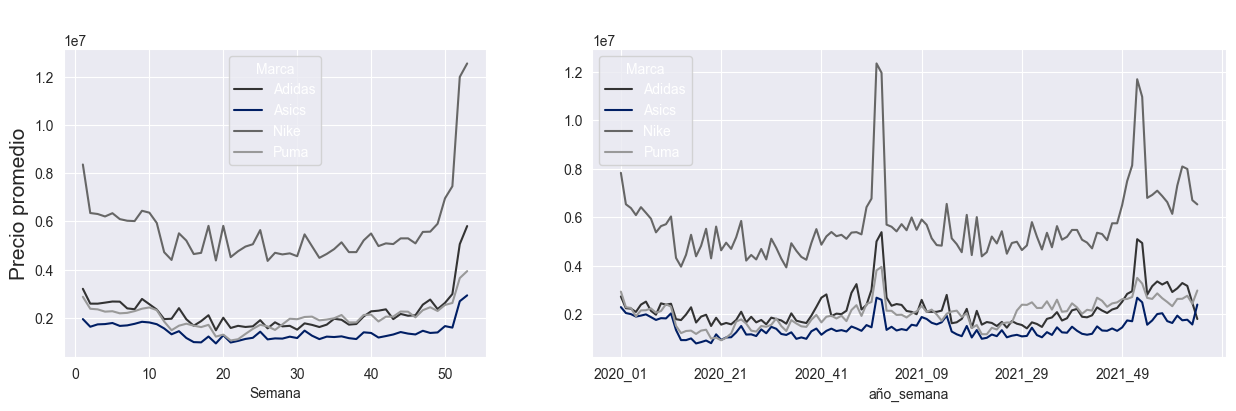

In [706]:
colors = ['#333333', '#001e64', '#666666', '#999999']

analisis = 'Marca'
valores = 'Facturación'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), gridspec_kw={'width_ratios': [1, 1.5]})

#Plot Semanas acumuladas
pivot_precio = df.pivot_table(index='Nombre Semana', columns=analisis, values=valores, aggfunc='mean').reset_index()
pivot_precio["Nombre Semana"] = pivot_precio["Nombre Semana"].str.split(" ").str[1].astype(int)
pivot_precio = pivot_precio.sort_values(by="Nombre Semana").set_index('Nombre Semana')
pivot_precio.plot(color=colors, ax=axes[0], xlabel='Semana')
axes[0].set_ylabel("Precio promedio", fontsize=15)

#plot evolucion
pivot_evolucion_precio = df.pivot_table(index='semana_año', columns=analisis, values=valores, aggfunc='mean')
pivot_evolucion_precio.plot(color=colors, ax=axes[1], xlabel="año_semana")

#plot show
fig.suptitle(f'Analisis de {valores} segun {analisis}', fontsize=15)
plt.show()

aplicaciones = ['Asics', '', '', 'Nike', '', '','Fitbit']

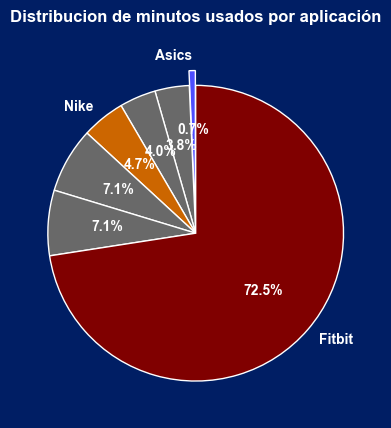

In [707]:
minutos_app = [0.69,3.76,3.99,4.74,7.16,7.16,72.68]
aplicaciones = ['Asics', '', '', 'Nike', '', '','Fitbit']

colores_pie = ['#4d4dff', '#696969', '#696969', '#cc6600', '#696969','#696969','#800000']

explode = (0.1, 0, 0, 0, 0, 0, 0)

fig, ax = plt.subplots()

# Set the face color of the axes (background color)
ax.set_facecolor('blue')
fig.set_facecolor(color_fondo)

ax.pie(minutos_app, labels=aplicaciones, startangle=90, explode=explode, autopct='%1.1f%%', textprops={'color':'white','weight': 'bold'},colors=colores_pie,labeldistance=1.1)
ax.set_title('Distribucion de minutos usados por aplicación', weight = 'bold', color = 'white', y = 1.05)
plt.savefig('imagenes/distribucion_apps.jpg', format = 'jpg', dpi = 300)
plt.show()

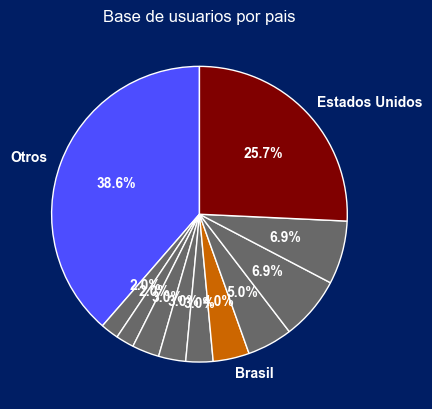

In [708]:
cantidades_paises = [39,2,2,3,3,3,4,5,7,7,26]
paises = ['Otros','','','','','','Brasil','','','','Estados Unidos']

colores_pie = ['#4d4dff', '#696969', '#696969', '#696969', '#696969','#696969','#cc6600','#696969','#696969','#696969','#800000']

#explode = (0.1, 0, 0, 0, 0, 0, 0)

fig, ax = plt.subplots()

# Set the face color of the axes (background color)
ax.set_facecolor('blue')
fig.set_facecolor(color_fondo)

ax.pie(cantidades_paises, labels=paises, startangle=90, autopct='%1.1f%%', textprops={'color':'white','weight': 'bold'},colors=colores_pie,labeldistance=1.1)
ax.set_title('Base de usuarios por pais',  color = 'white')
plt.savefig('imagenes/distribucion_app_paises.jpg', format = 'jpg', dpi = 300)
plt.show()

In [709]:
def running_o_deportes(row):
    if (row['Segmento'] == 'Running') and (row['Sub Marca'] == 'Asics'):
        return row['Sub Marca'] + '_running'
    elif (row['Segmento'] == 'O. Deportes') and (row['Sub Marca'] == 'Asics'):
        return row['Sub Marca'] + '_deportes'
    else:
        return row['Sub Marca']


df_asics['Sub Marca'] = df_asics.apply(running_o_deportes, axis=1)

C:\Users\agusd\AppData\Local\Temp\ipykernel_308\2551443192.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asics['Sub Marca'] = df_asics.apply(running_o_deportes, axis=1)


In [710]:
df

,Nombre Semana,Año,Semestre,Trimestre,Mes,Dia del Mes,Marca,Segmento,Mercado,Cantidad,Facturación,Precio,Sub Marca,nombre_del_dia,dia,mes,año,fecha,semana_año,numero_semana
0,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Nike,Futbol,Mercado 1,691,6093252.00,8818.02,Nike,Jueves,2,1,2020,2020-01-02,2020_01,1
1,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Nike,Futbol,Mercado 2,683,6022704.00,8818.01,Nike,Jueves,2,1,2020,2020-01-02,2020_01,1
2,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Nike,Running,Mercado 1,661,5348147.00,8090.99,Nike,Jueves,2,1,2020,2020-01-02,2020_01,1
3,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Nike,Running,Mercado 2,520,4207317.00,8090.99,Nike,Jueves,2,1,2020,2020-01-02,2020_01,1
4,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Nike,Social,Mercado 1,993,12547566.00,12636.02,Nike,Jueves,2,1,2020,2020-01-02,2020_01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25165,Semana 9,2022,S1-22,T1-22,Febrero 2022,26 de Febrero de 2022,Asics,Running,Mercado 2,526,5477198.00,10412.92,Asics,Sabado,26,2,2022,2022-02-26,2022_09,9
25166,Semana 9,2022,S1-22,T1-22,Febrero 2022,26 de Febrero de 2022,Asics,Social,Mercado 1,279,3424165.00,12272.99,Onitsuka Tiger,Sabado,26,2,2022,2022-02-26,2022_09,9
25167,Semana 9,2022,S1-22,T1-22,Febrero 2022,26 de Febrero de 2022,Asics,Social,Mercado 2,242,2970059.00,12272.97,Onitsuka Tiger,Sabado,26,2,2022,2022-02-26,2022_09,9
25168,Semana 9,2022,S1-22,T1-22,Febrero 2022,26 de Febrero de 2022,Asics,Social,Mercado 1,128,1163648.00,9091.00,Asics Tiger,Sabado,26,2,2022,2022-02-26,2022_09,9


In [711]:
#df_asics = df[df["Marca"] == "Asics"]

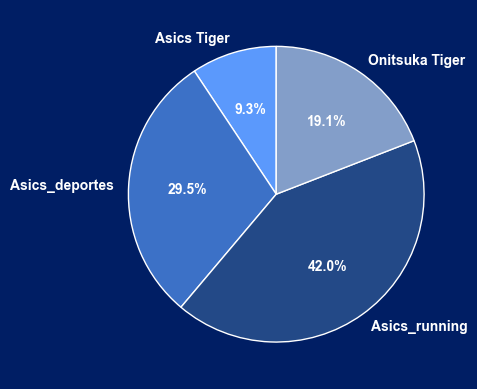

In [712]:
colores_cantidad = ['#5b99fc','#3c71c7','#234987', '#839ec9']

fig, ax = plt.subplots()

# Set the face color of the axes (background color)
ax.set_facecolor('blue')
fig.set_facecolor(color_fondo)

cantidad_vendida_segmento_Asics = df_asics.groupby(['Sub Marca', 'Segmento']).agg(cantidad = ('Cantidad', 'sum'))
cantidad_vendida_segmento_Asics = cantidad_vendida_segmento_Asics.reset_index().drop('Segmento',axis=1).set_index('Sub Marca')
plt.pie(cantidad_vendida_segmento_Asics['cantidad'], labels = cantidad_vendida_segmento_Asics.index, startangle=90, colors=colores_cantidad, autopct='%1.1f%%', textprops={'weight':'bold','color':'white'})
plt.savefig('imagenes/cantidades_segmento_asics.jpg',format = 'jpg', dpi = 300)
plt.show()

C:\Users\agusd\AppData\Local\Temp\ipykernel_308\733283776.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')


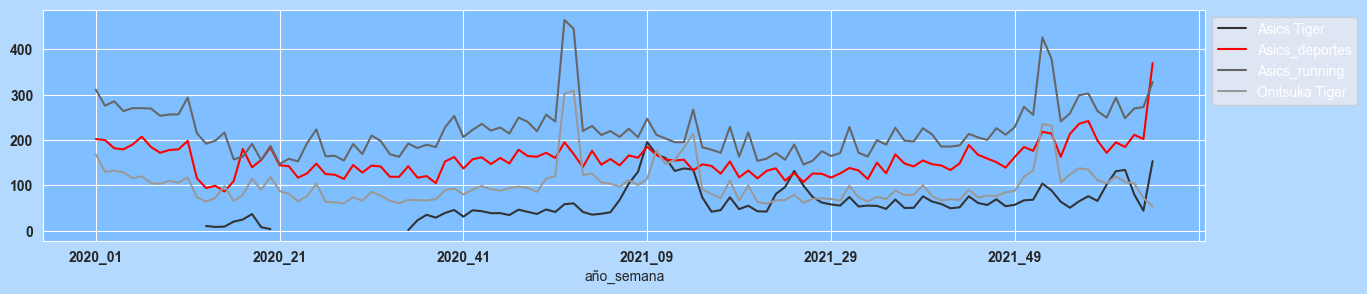

In [713]:

# Your data preparation code (assuming 'df_asics' is defined)

colors = ['#333333', 'red', '#666666', '#999999']

# Set the figsize parameter to adjust the width of the figure
fig, ax = plt.subplots(figsize=(15, 3))

pivot_evolucion_cantidad = df_asics.pivot_table(index='semana_año', columns='Sub Marca', values='Cantidad')
ax = pivot_evolucion_cantidad.plot(color=colors, xlabel="año_semana", ax=ax)

# Setting the background color of the plot using set_facecolor() method
ax.set_facecolor("#80bfff")

# Set x-axis and y-axis tick labels to bold and white
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Set background color of the overall figure
fig.patch.set_facecolor('#b3d9ff')
plt.savefig('imagenes/evoluciones_segmentos.jpg', format = 'jpg', dpi = 300)
plt.show()


Cuenta con tres submarcas: **Asics Onitsuka Tiger y Ascs Tiger**, siendo que la primera esta enfocada en deportes (running y otros deportes) y las dos últimas en lifestyle (social).

Asics es al sub marca que vende mayor cantidad (72%), siendo pro lo tanto la que más factura, habiendo generado el 68% de los ingresos del periodo). Sin embargo, Onitsuka Tiger es la de mayor precio promedio, siendo que la categoría social tiene productos de mayor precios


El segmento del cual más se venden es running, siendo social el de mayor cantidad vendida, mientras que social es le segmento de mayor precio promedio, llevando a que el segmento de mayor facturación sea running (41,5%), seguido por social (32,3%)

In [714]:
df_asics

,Nombre Semana,Año,Semestre,Trimestre,Mes,Dia del Mes,Marca,Segmento,Mercado,Cantidad,Facturación,Precio,Sub Marca,nombre_del_dia,dia,mes,año,fecha,semana_año
19165,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Asics,O. Deportes,Mercado 1,128,1179499.86,9214.84,Asics_deportes,Jueves,2,1,2020,2020-01-02,2020_01
19166,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Asics,O. Deportes,Mercado 2,269,2478802.70,9214.88,Asics_deportes,Jueves,2,1,2020,2020-01-02,2020_01
19167,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Asics,Running,Mercado 1,209,2051962.00,9818.00,Asics_running,Jueves,2,1,2020,2020-01-02,2020_01
19168,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Asics,Running,Mercado 2,225,2209053.00,9818.01,Asics_running,Jueves,2,1,2020,2020-01-02,2020_01
19169,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Asics,Social,Mercado 1,127,1604772.00,12636.00,Onitsuka Tiger,Jueves,2,1,2020,2020-01-02,2020_01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25165,Semana 9,2022,S1-22,T1-22,Febrero 2022,26 de Febrero de 2022,Asics,Running,Mercado 2,526,5477198.00,10412.92,Asics_running,Sabado,26,2,2022,2022-02-26,2022_09
25166,Semana 9,2022,S1-22,T1-22,Febrero 2022,26 de Febrero de 2022,Asics,Social,Mercado 1,279,3424165.00,12272.99,Onitsuka Tiger,Sabado,26,2,2022,2022-02-26,2022_09
25167,Semana 9,2022,S1-22,T1-22,Febrero 2022,26 de Febrero de 2022,Asics,Social,Mercado 2,242,2970059.00,12272.97,Onitsuka Tiger,Sabado,26,2,2022,2022-02-26,2022_09
25168,Semana 9,2022,S1-22,T1-22,Febrero 2022,26 de Febrero de 2022,Asics,Social,Mercado 1,128,1163648.00,9091.00,Asics Tiger,Sabado,26,2,2022,2022-02-26,2022_09


La distinción de mercado parecería no tener tanta relevancia, como vemos el precio es igual en ambos mercados (tiene sentido ya que es el mismo país), siendo que se vende mayor cantidad y se factura mas en el Mercado 2.

In [715]:
df_mercado_1 = df[df['Mercado'] == 'Mercado 1']

pivot_gral = df_mercado_1.pivot_table(index = 'fecha', columns= ['Marca'], values = ['Cantidad','Precio'], aggfunc={'Cantidad':'sum', 'Precio':'mean'}).reset_index()

columnas_nuevas = []
for i in pivot_gral.columns:
    columnas_nuevas.append(i[0] + "_" + i[1])

pivot_gral.columns = columnas_nuevas
#pivot_gral.drop(['Precio_Asics Tiger','Cantidad_Asics Tiger'], axis=1, inplace=True)
pivot_gral = pivot_gral.dropna()


In [716]:
pivot_gral

,fecha_,Cantidad_Adidas,Cantidad_Asics,Cantidad_Nike,Cantidad_Puma,Precio_Adidas,Precio_Asics,Precio_Nike,Precio_Puma
0,2020-01-02,895.00,464.00,2722.00,1400.00,9484.86,10556.28,9585.25,7522.41
1,2020-01-03,990.00,495.00,2907.00,1522.00,9482.26,10556.28,9585.25,7704.18
2,2020-01-04,1454.00,704.00,4156.00,1924.00,9488.25,10132.27,9267.25,7704.21
3,2020-01-05,1588.00,728.00,4748.00,1908.00,9488.53,10132.27,9267.25,7704.22
4,2020-01-06,724.00,385.00,2332.00,1062.00,9489.76,10132.27,9267.24,7704.17
...,...,...,...,...,...,...,...,...,...
795,2022-03-10,884.00,355.00,1950.00,1312.00,8685.61,11247.87,10480.86,7593.34
796,2022-03-11,1037.00,473.00,2263.00,1163.00,8674.80,11244.40,10232.92,7577.96
797,2022-03-12,1959.00,980.00,3320.00,1784.00,8674.62,11271.59,10241.14,7607.64
798,2022-03-13,1689.00,625.00,3479.00,1725.00,8674.45,11257.96,10232.60,7535.63


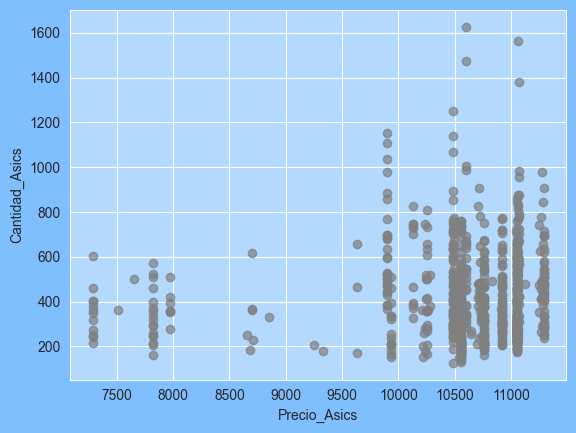

In [717]:
fig, ax = plt.subplots()
fig.patch.set_facecolor("#80bfff")


scatter = ax.scatter(pivot_gral['Precio_Asics'], pivot_gral['Cantidad_Asics'], c = 'grey', alpha = 0.7)

ax.set_facecolor('#b3d9ff')

ax.set_xlabel('Precio_Asics')
ax.set_ylabel('Cantidad_Asics')

plt.savefig('imagenes/correlacion_asics.jpg', format = 'jpg', dpi = 300)
plt.show()

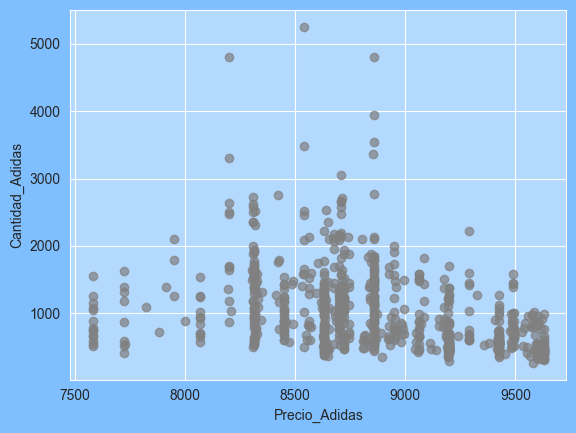

In [718]:
fig, ax = plt.subplots()
fig.patch.set_facecolor("#80bfff")


scatter = ax.scatter(pivot_gral['Precio_Adidas'], pivot_gral['Cantidad_Adidas'], c = 'grey', alpha = 0.7)

ax.set_facecolor('#b3d9ff')

ax.set_xlabel('Precio_Adidas')
ax.set_ylabel('Cantidad_Adidas')

plt.savefig('imagenes/correlacion_adidas.jpg', format = 'jpg', dpi = 300)
plt.show()

In [719]:
from scipy import stats
import numpy as np

def remove_outliers(df, columns_to_exclude=None, z_threshold=3):
    if columns_to_exclude is None:
        columns_to_exclude = []

    # Exclude specified columns from outlier detection
    numeric_columns = df.select_dtypes(include=[np.number]).columns.difference(columns_to_exclude)

    # Calculate z-scores for numeric columns
    z_scores = stats.zscore(df[numeric_columns])

    # Identify rows where any numeric column's z-score exceeds the threshold
    outliers_mask = (abs(z_scores) < z_threshold).all(axis=1)

    # Return DataFrame without outliers
    return df[outliers_mask]

columns_to_exclude = ['fecha']

# Remove outliers from numeric columns while excluding the 'Date' column
pivot_gral = remove_outliers(pivot_gral, columns_to_exclude)

# Display the modified DataFrame
pivot_gral.head()

,fecha_,Cantidad_Adidas,Cantidad_Asics,Cantidad_Nike,Cantidad_Puma,Precio_Adidas,Precio_Asics,Precio_Nike,Precio_Puma
0,2020-01-02,895.00,464.00,2722.00,1400.00,9484.86,10556.28,9585.25,7522.41
1,2020-01-03,990.00,495.00,2907.00,1522.00,9482.26,10556.28,9585.25,7704.18
2,2020-01-04,1454.00,704.00,4156.00,1924.00,9488.25,10132.27,9267.25,7704.21
3,2020-01-05,1588.00,728.00,4748.00,1908.00,9488.53,10132.27,9267.25,7704.22
4,2020-01-06,724.00,385.00,2332.00,1062.00,9489.76,10132.27,9267.24,7704.17


In [720]:
X = pivot_gral[['Precio_Adidas','Precio_Asics', 'Precio_Nike', 'Precio_Puma']]
X = sm.add_constant(X)
y = pivot_gral['Cantidad_Asics']

model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Cantidad_Asics   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     35.82
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.72e-27
Time:                        16:52:09   Log-Likelihood:                -4651.6
No. Observations:                 718   AIC:                             9313.
Df Residuals:                     713   BIC:                             9336.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           465.7937    241.246      1.931

# Correlaciones a nivel marcas generales

En general la Marca Asics, ve mas afectada su

In [721]:
pivot_sub_segmento_semanal = df_mercado_1.pivot_table(index = 'semana_año', columns= ['Sub Marca','Segmento'], values = ['Cantidad','Precio'], aggfunc={'Cantidad':'sum', 'Precio':'mean'}).reset_index()

columnas_nuevas_sub_seg = []
for i in pivot_sub_segmento_semanal.columns:
   columnas_nuevas_sub_seg.append(i[0] + "_" + i[1] + "_" + i[2])

pivot_sub_segmento_semanal.columns = columnas_nuevas_sub_seg

pivot_sub_segmento_semanal = pivot_sub_segmento_semanal.drop(['Precio_Asics Tiger_Social','Cantidad_Asics Tiger_Social'], axis=1)


In [722]:
X = pivot_sub_segmento_semanal[['Precio_Adidas_Futbol',
       'Precio_Adidas_O. Deportes', 'Precio_Adidas_Running',
       'Precio_Adidas_Social', 'Precio_Asics_O. Deportes',
       'Precio_Asics_Running', 'Precio_Nike_Futbol', 'Precio_Nike_O. Deportes',
       'Precio_Nike_Running', 'Precio_Nike_Social',
       'Precio_Onitsuka Tiger_Social', 'Precio_Puma_Futbol',
       'Precio_Puma_O. Deportes', 'Precio_Puma_Running', 'Precio_Puma_Social']]

X = sm.add_constant(X)
y = pivot_sub_segmento_semanal['Cantidad_Asics_Running']

model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Cantidad_Asics_Running   R-squared:                       0.452
Model:                                OLS   Adj. R-squared:                  0.370
Method:                     Least Squares   F-statistic:                     5.497
Date:                    Tue, 21 Nov 2023   Prob (F-statistic):           5.55e-08
Time:                            16:52:09   Log-Likelihood:                -794.84
No. Observations:                     116   AIC:                             1622.
Df Residuals:                         100   BIC:                             1666.
Df Model:                              15                                         
Covariance Type:                nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

# Cambios de precios

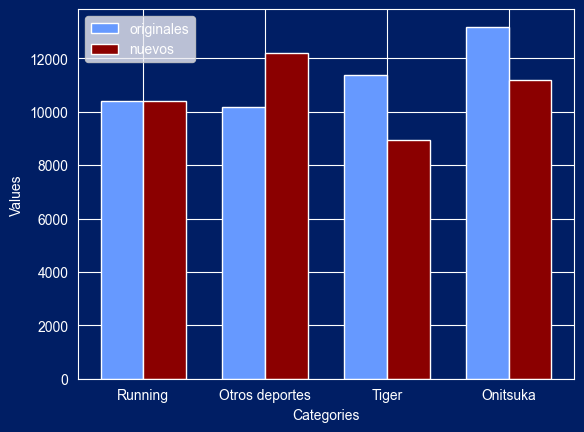

In [723]:
precios_antes = [10382.54734,10165.43729,11363.91209,13181.98235]
precios_nuevos = [10382.54734,12198.52474,8929.783974,11204.685]

productos = ['Running', 'Otros deportes', 'Tiger', 'Onitsuka']

bar_width = 0.35  # Width of the bars
index = range(len(productos))

fig, ax = plt.subplots()

# Plot bars
bar1 = ax.bar(index, precios_antes, width=bar_width, label='originales', color='#6699ff')
bar2 = ax.bar([i + bar_width for i in index], precios_nuevos, width=bar_width, label='nuevos', color='#8B0000')

# Adding labels and title
ax.set_xlabel('Categories', color = 'white')
ax.set_ylabel('Values', color = 'white')
#ax.set_title('Bar Chart with Two Y Values per X Value')
ax.set_xticks([i + bar_width / 2 for i in index])  # Adjust x-axis ticks
ax.set_xticklabels(productos)

ax.legend().get_texts()[0].set_color('white')
ax.legend().get_texts()[1].set_color('white')

# Adding legend
ax.legend()

# Change the background color
ax.set_facecolor('#001e64ff')
fig.set_facecolor('#001e64ff')

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')

ax.tick_params(axis='both', colors='white')
# Save the plot as a JPEG image
plt.savefig('imagenes/cambio_precios.jpg', format='jpg', dpi=300)

# Display the plot
plt.show()


Han habido cambios similares de precio de este tipo?

In [724]:
pivot_sub_segmento = df_mercado_1.pivot_table(index = 'fecha', columns= ['Sub Marca','Segmento'], values = ['Cantidad','Precio'], aggfunc={'Cantidad':'min', 'Precio':'mean'}).dropna()#.reset_index()

In [725]:
columnas_nuevas_sub_seg = []
for i in pivot_sub_segmento.columns:
   columnas_nuevas_sub_seg.append(i[0] + "_" + i[1] + "_" + i[2])

pivot_sub_segmento.columns = columnas_nuevas_sub_seg

In [726]:
pivot_sub_segmento.head()

,Cantidad_Adidas_Futbol,Cantidad_Adidas_O. Deportes,Cantidad_Adidas_Running,Cantidad_Adidas_Social,Cantidad_Asics_O. Deportes,Cantidad_Asics_Running,Cantidad_Asics Tiger_Social,Cantidad_Nike_Futbol,Cantidad_Nike_O. Deportes,Cantidad_Nike_Running,...,Precio_Asics Tiger_Social,Precio_Nike_Futbol,Precio_Nike_O. Deportes,Precio_Nike_Running,Precio_Nike_Social,Precio_Onitsuka Tiger_Social,Precio_Puma_Futbol,Precio_Puma_O. Deportes,Precio_Puma_Running,Precio_Puma_Social
fecha,,,,,,,,,,,,,,,,,,,,,
2020-03-24,176.00,29.00,89.00,325.00,33.00,115.00,3.00,178.00,236.00,396.00,...,11364.00,8818.03,8795.96,8090.99,12636.01,12636.02,7200.00,6908.55,8182.00,8181.35
2020-03-25,186.00,25.00,85.00,316.00,41.00,127.00,3.00,228.00,217.00,439.00,...,11364.00,8818.04,8795.93,8091.00,12634.35,12636.02,7200.00,6908.49,8182.00,8181.25
2020-03-26,193.00,29.00,92.00,354.00,41.00,136.00,13.00,208.00,276.00,487.00,...,11363.92,8818.03,8795.95,8091.00,12634.56,12636.02,7200.00,6908.54,8182.00,8181.33
2020-03-27,290.00,51.00,104.00,625.00,57.00,186.00,7.00,187.00,297.00,531.00,...,11364.00,8716.37,8795.95,8091.00,12636.02,12636.02,7200.00,6908.59,8182.00,8181.34
2020-03-28,324.00,51.00,68.00,817.00,57.00,208.00,2.00,181.00,309.00,677.00,...,11364.00,8779.82,8795.94,8091.00,12636.01,12636.01,7200.00,6908.76,8181.99,8181.33


In [727]:
columnas_asics = ['Precio_Asics_O. Deportes', 'Precio_Asics_Running', 'Precio_Asics Tiger_Social', 'Precio_Onitsuka Tiger_Social']

In [728]:
pivot_sub_segmento_variacion = pivot_sub_segmento.pct_change() * 100
pivot_sub_segmento_variacion = pivot_sub_segmento_variacion.fillna(0)

In [729]:
pivot_sub_segmento_variacion[columnas_asics].sort_values(by='Precio_Asics_O. Deportes', ascending=False).head(5)

,Precio_Asics_O. Deportes,Precio_Asics_Running,Precio_Asics Tiger_Social,Precio_Onitsuka Tiger_Social
fecha,,,,
2020-08-28,97.97,10.20,0.00,27.52
2021-11-10,10.32,0.00,0.00,0.00
2020-04-14,3.48,0.00,0.00,17.29
2020-04-01,3.04,0.00,0.00,0.00
2020-04-08,2.89,-0.00,0.00,0.00


In [730]:
pivot_sub_segmento_variacion[columnas_asics].sort_values(by='Precio_Asics_Running', ascending=False).head(5)

,Precio_Asics_O. Deportes,Precio_Asics_Running,Precio_Asics Tiger_Social,Precio_Onitsuka Tiger_Social
fecha,,,,
2020-08-28,97.97,10.20,0.00,27.52
2020-10-21,-0.00,6.43,-0.00,0.00
2022-03-12,-0.00,1.06,0.00,-0.00
2022-03-14,0.00,0.24,-0.00,0.00
2022-02-22,0.00,0.16,0.00,-0.00


In [731]:
pivot_sub_segmento_variacion[columnas_asics].sort_values(by='Precio_Asics Tiger_Social', ascending=True).head(5)

,Precio_Asics_O. Deportes,Precio_Asics_Running,Precio_Asics Tiger_Social,Precio_Onitsuka Tiger_Social
fecha,,,,
2020-04-17,-23.55,0.00,-44.23,-3.44
2022-02-04,0.00,-0.00,-20.00,0.00
2021-02-03,-0.00,-0.00,-19.55,0.00
2021-06-01,0.00,-0.00,-14.48,0.00
2020-04-18,-33.93,0.00,-10.35,-3.89


In [732]:
pivot_sub_segmento_variacion[columnas_asics].sort_values(by='Precio_Onitsuka Tiger_Social', ascending=True).head(5)

,Precio_Asics_O. Deportes,Precio_Asics_Running,Precio_Asics Tiger_Social,Precio_Onitsuka Tiger_Social
fecha,,,,
2021-03-03,-0.00,0.00,0.00,-17.93
2020-04-04,-1.02,-0.00,0.00,-14.74
2020-12-18,-0.00,0.00,-0.00,-9.79
2022-01-14,0.00,-0.06,0.00,-6.90
2022-02-28,-0.00,0.02,-0.00,-6.90
